In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data = pd.read_csv("tweets_v8.csv")
print(data.head())

                    user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00           581.0        1035.0           8922.0   
1  2013-05-08 19:35:26+00:00           741.0         730.0           8432.0   
2  2009-02-21 10:31:30+00:00           562.0        1197.0          62732.0   
3  2021-02-14 13:21:22+00:00             3.0         277.0

In [3]:
data = data.drop(columns="user_location", axis=1)

In [4]:
print(data.isnull().sum())

user_name             0
user_description    802
user_created          0
user_followers        1
user_friends          1
user_favourites       1
user_verified         1
date                  1
text                  1
source                1
is_retweet            1
dtype: int64


In [5]:
data = data.drop(columns="user_description", axis=1)
data = data.dropna()

In [6]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


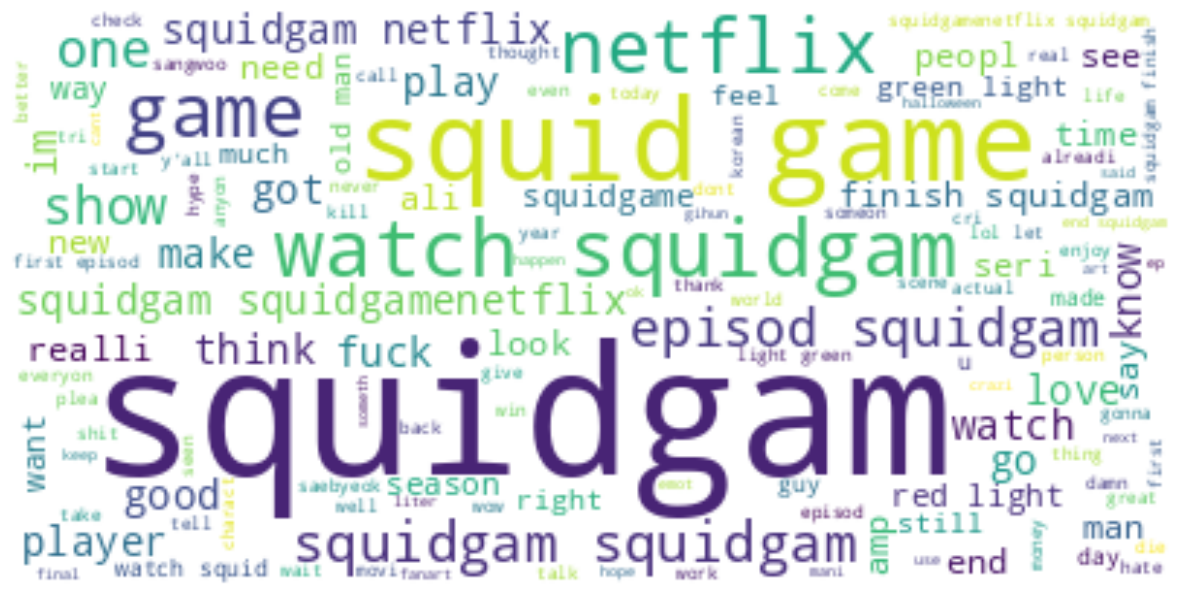

In [7]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                text  Positive  Negative  \
0  life hit time poverti strike yougong yoo  let ...     0.173     0.108   
1                    marbl episod squidgam  ruin 😭😭😭     0.000     0.487   
2                                      squidgam time     0.000     0.000   
3  blood  slideim join squidgam thing im alreadi ...     0.142     0.277   
4  two first game player kill mask guy  bloodi ni...     0.000     0.461   

   Neutral  
0    0.719  
1    0.513  
2    1.000  
3    0.581  
4    0.539  


In [9]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [10]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1646.580000000001
Negative:  1102.9659999999978
Neutral:  10576.429999999984
